##### Stock price prediction on one year of NVIDIA prices 

This is going to be an instructive walkthrough of using XGBoost.
I will demonstrate each step including cleaning the data extracting features

CSV data downloaded from Yahoo Finance: https://finance.yahoo.com/quote/NVDA/history?p=NVDA

Time Period: May 25, 2022 - May 25, 2023

##### Cleaning the CSV data and removing unnecessary columns

In [4]:
import os,csv

INPUT_FNAME = "NVDA.csv"
OUTPUT_FNAME = "NVDA_clean.csv"

inputfile = open(INPUT_FNAME, "r")

outputfile = open(OUTPUT_FNAME, "w")

if os.stat(OUTPUT_FNAME).st_size == 0:
    print(OUTPUT_FNAME, "is empty, proceeding to clean input file")
    reader = csv.reader(inputfile)
    for i, line in enumerate(reader):
        outputfile.write(",".join([line[0], line[4]]))
        outputfile.write("\n")
    outputfile.close()

NVDA_clean.csv is empty, proceeding to clean input file


#### Plot the sanitized data

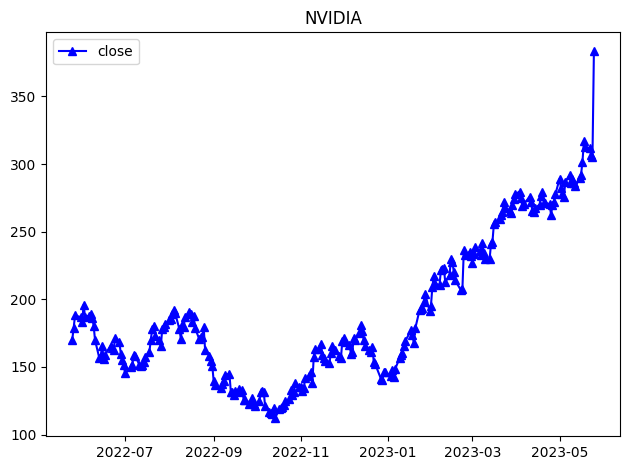

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./NVDA_clean.csv")

data["Date"] = pd.to_datetime(data["Date"])
# date vs open
# date vs close
plt.plot(data["Date"], data["Close"], c="b", label="close", marker="^")
plt.title("NVIDIA")
plt.legend()
plt.tight_layout()

# Create the features for the data set

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("./NVDA_clean.csv")

data["Date"] = pd.to_datetime(data["Date"])

# Drop the header from the feature (input) column.
X = data.drop("Close", axis = 1)

# Create data frame for the target (output).
y = data[["ClosePrice"]]





          Date
0   2022-05-25
1   2022-05-26
2   2022-05-27
3   2022-05-31
4   2022-06-01
..         ...
247 2023-05-19
248 2023-05-22
249 2023-05-23
250 2023-05-24
251 2023-05-25

[252 rows x 1 columns]
